In [1]:
X = pd.read_csv('edited_train.csv')
y = X['TripType']
X = X.drop('TripType', axis=1)

In [2]:
%matplotlib inline
from sklearn.model_selection import *
from sklearn.ensemble import *
from sklearn.model_selection import validation_curve
from scipy import sparse

In [5]:
X = sparse.csr_matrix(X)
gx = X[:10000]
gt = y[:10000]

In [7]:
forest = ExtraTreesClassifier()
# range setting
estimator_range = range(5, 100, 20)
depth_range = range(1, 20, 3)
# grid setting
param_grid = {
    'n_estimators': estimator_range,
    'max_features': ['auto', 'log2'],
    'max_depth': depth_range
}


In [8]:
# matke GS
gs = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1
                 ,return_train_score=True)
%time gs = gs.fit(X, y)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 1min 27s, sys: 1.02 s, total: 1min 28s
Wall time: 18min 24s


만개 돌리는데 18분...

In [9]:
print("best_params", gs.best_params_)
print("best_score", gs.best_score_)

best_params {'max_depth': 19, 'max_features': 'auto', 'n_estimators': 85}
best_score 0.5281894767648473


In [10]:
forest = ExtraTreesClassifier(max_features='auto')

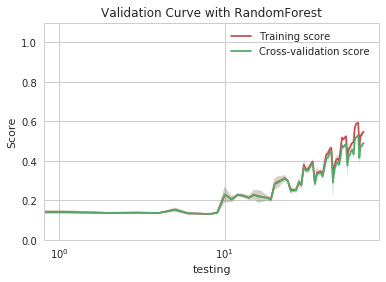

In [11]:
train_scores_mean =gs.cv_results_['mean_train_score']
train_scores_std = gs.cv_results_['std_train_score']
test_scores_mean = gs.cv_results_['mean_test_score']
test_scores_std = gs.cv_results_['std_test_score']

param_range = range(len(train_scores_mean)) # 사이즈에 맞게 range 변경

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("testing")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

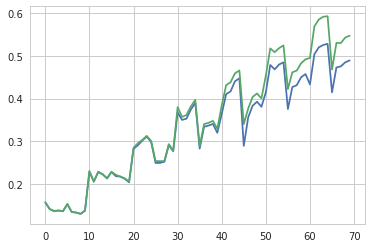

In [12]:
plt.plot(gs.cv_results_["mean_test_score"])
plt.plot(gs.cv_results_["mean_train_score"])
plt.show()

#### 범위를 넓혀서 돌려야할듯

In [13]:
%%time
param_range=depth_range
train_scores, test_scores = \
    validation_curve(forest, X, y, 
                     param_name="max_depth", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


CPU times: user 14.4 s, sys: 188 ms, total: 14.5 s
Wall time: 1min 1s


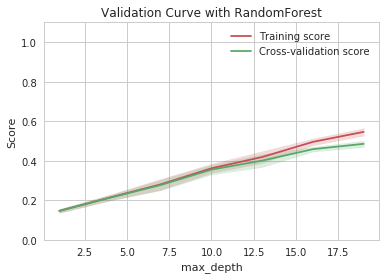

In [15]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.plot(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.plot(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

In [ ]:
%%time
param_range=estimator_range
train_scores, test_scores = \
    validation_curve(forest, X, y, 
                     param_name="n_estimators", param_range=param_range,
                     cv=10, scoring="accuracy", n_jobs=-1)

/home/mk/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [ ]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

mpl.rcParams["font.family"] = 'DejaVu Sans'
plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.title("Validation Curve with RandomForest")
plt.xlabel("n_estimator")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.show()

---